In [1]:
import os 
os.chdir("C:\\Users\\prowm\\OneDrive\\Desktop\\Data Science\\Public Services")

%run -i "libraries.py"
%run -i "functions.py"

In [4]:
import bokeh
from bokeh.io import output_notebook
from bokeh.layouts import column, gridplot
from bokeh.plotting import figure, show
from sklearn.manifold import TSNE
from tqdm import tnrange, tqdm_notebook

# Bokeh often has some problems with plots, run the following lines to hopefully fix the problem
#bokeh.io.reset_output()
#bokeh.io.output_notebook()

# 1. File reading

In [3]:
data_prep = pd.read_csv("NYT-Preprocessing.csv", sep=";", encoding="UTF-8")

FileNotFoundError: File b'NYT-Preprocessing.csv' does not exist

# 1.1 Sampling

In [5]:
# sampling because TSNE is really slow
data_test = data_prep.sample(40000)
comment_list = []
for i in range(len(data_test)):
    comment_list.append(data_test["Comments"].iloc[i].split(" "))

# 2. W2V and t-SNE

In [7]:
"""
sg_list:         method, where 0 is CBOW, 1 Skip-Gram
size_list:       vector size list, lenght of the vector where elements will be stored
iterations:      number of iteration (from previous analysis there was no difference between 1000 or something more)
perplexity_list: perplexity values passed as input to the TSNE
"""

sg_list = [0, 1]
size_list = [100, 200, 300]
iter_list = [1000]
perplexity_list = [10, 20, 30, 50]
model_list = []
plot_list = []
#output_notebook()

# List of empty (at the moment) plots
for i in range(len(sg_list)*len(size_list)*len(iter_list)*len(perplexity_list)):
    globals()["plot" + str(i)] = None
    plot_list.append(globals()["plot" + str(i)])

# TSNE with every combination of parameters (grid-search like approach)
# But first we need to create the w2v representation
for sg in tnrange(len(sg_list), desc="method_loop"):
    for size in tnrange(len(size_list), desc="size_loop"):
        model = Word2Vec(sentences=comment_list, size=size_list[size], sg=sg_list[sg], window=10, min_count=5, seed=0)
        model.save("20000word2vec_method" + str(sg_list[sg]) + "size" + str(size_list[size]) + ".model")
        model_list.append(model)

        X = model[model.wv.vocab]
        for it in tnrange(len(iter_list), desc="iteration_loop"):
            for perplexity in tnrange(len(perplexity_list), desc="perplexity_loop"):
                tsne = TSNE(n_components=2, n_iter=iter_list[it], 
                            perplexity=perplexity_list[perplexity], n_iter_without_progress=50)
                
                # Saving 2D coordinates and datasets for future loadings
                X_2d = tsne.fit_transform(X)
                coords_df = pd.DataFrame(X_2d, columns=['x','y'])
                coords_df['token'] = model.wv.vocab.keys()
                filename = "model_type" + str(sg_list[sg]) + "model_size" + str(size_list[size]) + "perplexity" + str(perplexity_list[perplexity])
                coords_df.to_csv(filename, encoding="UTF-8", index=False)
                
                # Update the plot list
                for plot in range(len(plot_list)):
                    if plot_list[plot] == None:
                        title = str("Method: " + str(sg_list[sg]) + " size: " + str(size_list[size]) + 
                                    " iterations: " + str(iter_list[it]) + " perplexity: " + 
                                    str(perplexity_list[perplexity]))
                        plot_list[plot] = figure(plot_width=750, plot_height=750, 
                                                 title=title)
                        plot_list[plot].scatter(coords_df['x'], coords_df['y'], marker='o')
                        break

HBox(children=(IntProgress(value=0, description='method_loop', max=2, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='size_loop', max=3, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='iteration_loop', max=1, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='perplexity_loop', max=4, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='iteration_loop', max=1, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='perplexity_loop', max=4, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='iteration_loop', max=1, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='perplexity_loop', max=4, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='size_loop', max=3, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='iteration_loop', max=1, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='perplexity_loop', max=4, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='iteration_loop', max=1, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='perplexity_loop', max=4, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='iteration_loop', max=1, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='perplexity_loop', max=4, style=ProgressStyle(description_width='initial')), HTML(value='')))

# 2.2 Load data

In [5]:
tsne_path = "C:\\Users\\prowm\\OneDrive\\Desktop\\Data Science\\Public Services\\TSNE\\*.csv"
tsne_list = glob.glob(tsne_path)
tsne_files = []

# File load
for file in tsne_list:
    with open(file, encoding="UTF-8") as f:
        reader = pd.read_csv(f, delimiter=",")
        tsne_files.append(reader)
        
# Same lists as above but I need these values for a proper title
sg_list = ["CBOW", "Skip Gram"]
size_list = [100, 200, 300]
perplexity_list = [10, 20, 30, 50]

# Create the titles
title_list = []
for m in range(len(sg_list)):
    title1 = "Model: " + sg_list[m]
    for s in range(len(size_list)):
        title2 = title1 + ", size_list: " + str(size_list[s])
        for p in range(len(perplexity_list)):
            title3 = title2 + ", perplexity: " + str(perplexity_list[p])
            title_list.append(title3)           
            title3 = title2

# Save plots
plot_list = [None]*24
for i in range(len(tsne_files)):
    plot_list[i] = figure(plot_width=550, plot_height=550, title=title_list[i])
    plot_list[i].scatter(tsne_files[i]['x'], tsne_files[i]['y'], marker='o', alpha=0.2)

In [4]:
show(plot_list[23])

# 3. Visualization

Grid plot

In [6]:
grid = gridplot([[plot_list[0], plot_list[1], plot_list[2], plot_list[3]],
                 [plot_list[4], plot_list[5], plot_list[6], plot_list[7]],
                 [plot_list[8], plot_list[9], plot_list[10], plot_list[11]],
                 [plot_list[12], plot_list[13], plot_list[14], plot_list[15]],
                 [plot_list[16], plot_list[17], plot_list[18], plot_list[19]],
                 [plot_list[20], plot_list[21], plot_list[22], plot_list[23]]])
show(grid)

Interactive text representation of the best model (according to us)

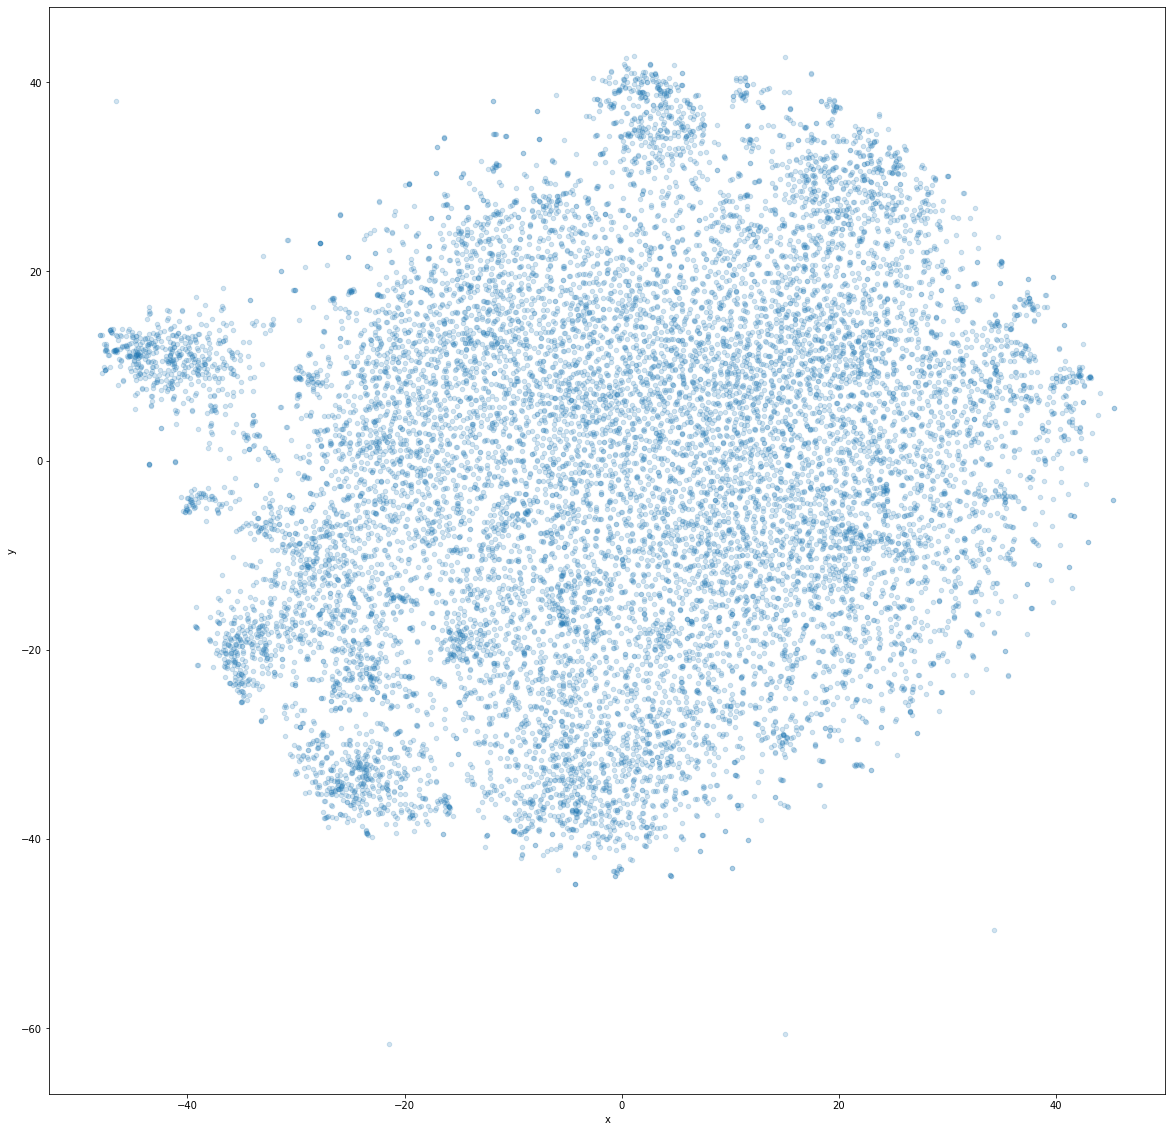

In [7]:
_ = tsne_files[23].plot.scatter("x", "y", figsize=(20, 20), marker="o", alpha=0.2)
p = figure(plot_width=1000, plot_height=1000)
_ = p.text(x=tsne_files[23].x, y=tsne_files[23].y, text=tsne_files[23].token)
show(p)